In [23]:
import feather
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your Feather file
feather_file_path = '/allah/freqtrade/user_data/data/binance/futures/ETH_USDT_USDT-3m-futures.feather'

# Read the data from the Feather file into a DataFrame
df_binance_3m = feather.read_dataframe(feather_file_path)
df_binance_3m['date'] = df_binance_3m['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Now, 'df' contains your data as a DataFrame, and you can perform analysis on it.





In [24]:
df_binance_3m

,date,open,high,low,close,volume
0,2019-11-27 07:45:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 07:48:00,146.00,146.00,146.00,146.00,0.000
2,2019-11-27 07:51:00,146.00,146.00,146.00,146.00,0.000
3,2019-11-27 07:54:00,146.00,146.00,146.00,146.00,0.000
4,2019-11-27 07:57:00,146.00,146.00,146.00,146.00,0.000
...,...,...,...,...,...,...
665765,2023-09-14 08:00:00,1620.67,1621.17,1619.40,1620.09,4258.856
665766,2023-09-14 08:03:00,1620.09,1621.53,1620.09,1620.22,2815.101
665767,2023-09-14 08:06:00,1620.23,1620.61,1620.15,1620.29,1071.633
665768,2023-09-14 08:09:00,1620.30,1620.45,1619.15,1619.44,2045.406


In [20]:
import pandas as pd

# Assuming df_combined is your DataFrame
df_analyzed = df_binance_3m.copy()
df_analyzed['date'] = pd.to_datetime(df_analyzed['date']) + pd.DateOffset(hours=8)

filtered_df = df_analyzed[
    df_analyzed['volume'] > (df_analyzed['volume'].rolling(window=6, min_periods=1).sum() - df_analyzed['volume'])
]

# Display the resulting DataFrame (last 100 rows)
filtered_df[-10:]


,date,open,high,low,close,volume
665108,2023-09-13 07:09:00,1593.90,1594.34,1589.49,1592.36,12273.548
665231,2023-09-13 13:18:00,1587.58,1587.70,1580.46,1582.91,20126.849
665258,2023-09-13 14:39:00,1584.01,1586.14,1583.55,1585.28,6724.302
665277,2023-09-13 15:36:00,1587.94,1602.77,1587.63,1601.41,34667.070
665375,2023-09-13 20:30:00,1601.07,1602.30,1591.30,1596.13,52404.060
665417,2023-09-13 22:36:00,1602.86,1611.50,1602.74,1604.77,48139.421
665434,2023-09-13 23:27:00,1608.98,1620.00,1608.07,1609.65,60456.053
665474,2023-09-14 01:27:00,1603.87,1604.80,1599.34,1602.18,25239.293
665574,2023-09-14 06:27:00,1607.03,1608.60,1607.02,1607.81,4344.192
665616,2023-09-14 08:33:00,1608.65,1615.43,1608.44,1612.27,23024.900


9.0


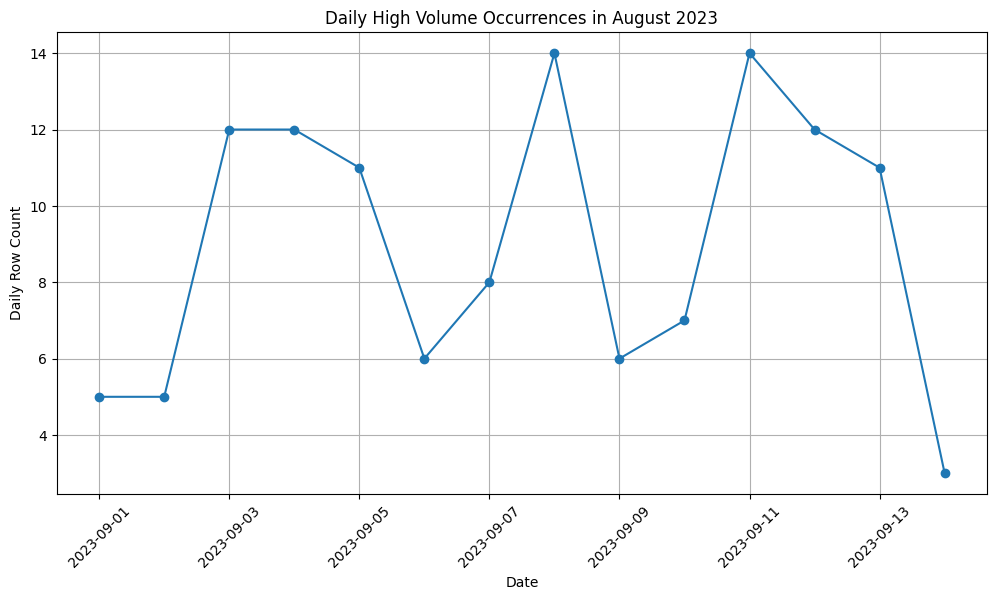

In [17]:
# Filter rows for August 2023
filtered_df_august_2023 = filtered_df[
    (filtered_df['date'].dt.year == 2023) & (filtered_df['date'].dt.month == 9)
]

# Group by date (day) and count the occurrences
daily_occurrences = filtered_df_august_2023.groupby(filtered_df_august_2023['date'].dt.date)['date'].count()
print(daily_occurrences.mean())
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(daily_occurrences.index, daily_occurrences.values, marker='o', linestyle='-')
plt.title('Daily High Volume Occurrences in August 2023')
plt.xlabel('Date')
plt.ylabel('Daily Row Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()